## Distances Between Histograms of Programs (POJ 104)
---

### Loading the libraries

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Loading the datasets

In [2]:
o3 = pd.read_csv("../features/poj_features_O3.csv", skipinitialspace=True)
o3 = o3.set_index('id')

o0 = pd.read_csv("../features/poj_features_O0.csv", skipinitialspace=True)
o0 = o0.set_index('id')

ollvm = pd.read_csv("../features/poj_features_ollvm.csv", skipinitialspace=True)
ollvm = ollvm.set_index('id')

### Datasets Normalization

In [3]:
# Min-Max
def normMinMax(df):
    cout = 0
    for column in df.columns:
        if not (df[column].max() == 0 and df[column].min() == 0):
            dif = df[column].max() - df[column].min()
            df[column] = (df[column] - df[column].min())/dif
        print("Column {} calculated".format(cout), end='\r')
        cout += 1
    return df

# Z-score 
def stnd(df):
    cout = 0
    for column in df.columns:
        if not (df[column].max() == 0 and df[column].min() == 0):
            mean = df[column].mean()
            df[column] = (df[column] - mean)/df[column].std()
        print("Column {} calculated".format(cout), end='\r')
        cout += 1
    return df

# Percentual
def perc(df):
    cout = 0
    for column in df.columns:
        s = df[column].sum()
        if not (s == 0):
            df[column] = (df[column]/s)
        print("Column {} calculated".format(cout), end='\r')
        cout += 1
    return df

In [4]:
o3 = o3.T
o3c = o3.loc['class']
o3 = o3.drop(['class'])

o3 = perc(o3)
o3 = o3.append(o3c)
o3 = o3.T

/tmp/ipykernel_268606/979317883.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o3 = o3.append(o3c)


In [5]:
o0 = o0.T
o0c = o0.loc['class']
o0 = o0.drop(['class'])

o0 = perc(o0)
o0 = o0.append(o0c)
o0 = o0.T

/tmp/ipykernel_268606/3199222233.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o0 = o0.append(o0c)


In [6]:
ollvm = ollvm.T
ollvmc = ollvm.loc['class']
ollvm = ollvm.drop(['class'])

ollvm = perc(ollvm)
ollvm = ollvm.append(ollvmc)
ollvm = ollvm.T

/tmp/ipykernel_268606/4026107826.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ollvm = ollvm.append(ollvmc)


### Collecting the distances between the programs of all classes
`o3Distances` is the distance between optimized and original programs.
`ollvmDistances` is the distance between obfuscated and original programs.

In [7]:
o3Distances = np.zeros(o0.shape[0])
ollvmDistances = np.zeros(o0.shape[0])

i = 0
for _, row in o0.loc[:, o0.columns != 'class'].iterrows():
    id = row.name
    original = row.to_numpy()

    if id in o3.index:
        temp = o3.loc[:, o3.columns != 'class'].loc[id]
        otimized = temp.to_numpy()
        dist = np.linalg.norm(original - otimized)
        o3Distances[i] = dist

    if id in ollvm.index:
        temp = ollvm.loc[:, ollvm.columns != 'class'].loc[id]
        obfuscated = temp.to_numpy()
        dist = np.linalg.norm(original - obfuscated)
        ollvmDistances[i] = dist

    print("The index {} was successfully calculated".format(i), end='\r')
    i += 1

In [8]:
print("Sum of distances between the O3 programs to original programs: {}".format(sum(o3Distances)))
print("Sum of distances between the OLLVM programs to original programs: {}".format(sum(ollvmDistances)))

Sum of distances between the O3 programs to original programs: 15068.26545711683
Sum of distances between the OLLVM programs to original programs: 14134.144374899171


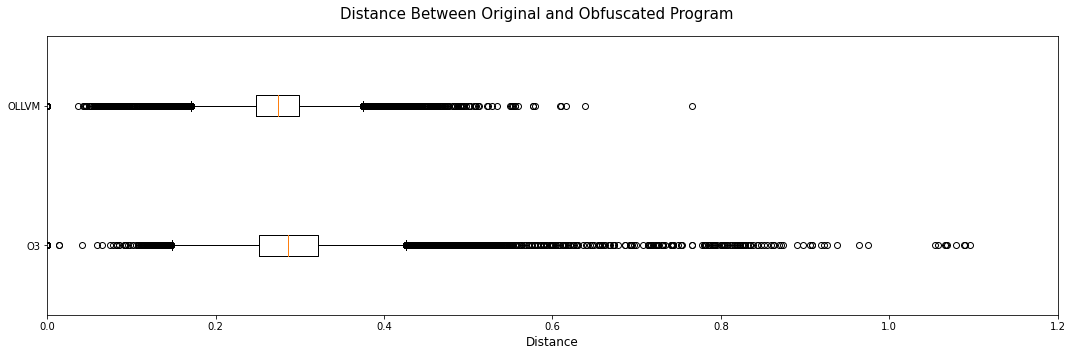

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

fig.suptitle('Distance Between Original and Obfuscated Program', fontsize=15)
ax.boxplot(
    [o3Distances, ollvmDistances], 
    vert=False, 
    showfliers=True,
    labels=('O3', 'OLLVM')
)
ax.set_xlabel("Distance", fontsize=12)
ax.set_xlim([0,1.2])

plt.savefig('pdfs/distance.pdf')
fig.tight_layout()

In [70]:
df_O3Distances = pd.Series(o3Distances)
df_ollvmDistances = pd.Series(ollvmDistances)

def countOutliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

out = countOutliers(df_ollvmDistances)
print("Number of outliers of OLLVM: {}".format(out.sum()))
out2 = countOutliers(df_O3Distances)
print("Number of outliers of O3: {}".format(out2.sum()))

Number of outliers of OLLVM: 1587
Number of outliers of O3: 1960


### Mean Histogram of each class

In [155]:
# Distance Between Classes
nClasses = 30

# Loading Database without normalization
# d1 = pd.read_csv("../features/poj_features_O3.csv", skipinitialspace=True)
# d1 = d1.set_index('id')

# d2 = pd.read_csv("../features/poj_features_O0.csv", skipinitialspace=True)
# d2 = d2.set_index('id')

# d3 = pd.read_csv("../features/poj_features_ollvm.csv", skipinitialspace=True)
# d3 = d3.set_index('id')

In [156]:
# Mean Vector of Classes
mvcO0 = []
mvcO3 = []
mvcOLLVM = []

for i in range(nClasses):
    mvcO0.append(o0[o0['class'] == (i + 1)].loc[:, o0.columns != 'class'].mean())
    mvcO3.append(o3[o3['class'] == (i + 1)].loc[:, o3.columns != 'class'].mean())
    mvcOLLVM.append(ollvm[ollvm['class'] == (i + 1)].loc[:, ollvm.columns != 'class'].mean())

    # Mean without normalization
    # mvcO0.append(d2[d2['class'] == (i + 1)].loc[:, d2.columns != 'class'].mean())
    # mvcO3.append(d1[d1['class'] == (i + 1)].loc[:, d1.columns != 'class'].mean())
    # mvcOLLVM.append(d3[d3['class'] == (i + 1)].loc[:, d3.columns != 'class'].mean())

### Normalizing mean histograms

In [157]:
for i in range(nClasses):
    mvcO0[i] = mvcO0[i]/mvcO0[i].sum()
    mvcO3[i] = mvcO3[i]/mvcO3[i].sum()
    mvcOLLVM[i] = mvcOLLVM[i]/mvcOLLVM[i].sum()   

### Distance between normalized mean histograms

In [158]:
dbcO0 = np.zeros((nClasses, nClasses))
dbcO3 = np.zeros((nClasses, nClasses))
dbcOLLVM = np.zeros((nClasses, nClasses))

for i in range(nClasses):
    for j in range(nClasses):
        dbcO0[i][j] = np.linalg.norm(mvcO0[i] - mvcO0[j])
        dbcO3[i][j] = np.linalg.norm(mvcO3[i] - mvcO3[j])
        dbcOLLVM[i][j] = np.linalg.norm(mvcOLLVM[i] - mvcOLLVM[j])

In [159]:
def printDistancesMatrix(m):
    fig, ax = plt.subplots(1, 1, figsize=(20,20))

    im = ax.imshow(m, cmap=plt.cm.Blues)
    ax.set_xlabel("Classes - 1")
    ax.set_ylabel("Classes - 1")
    ax.set_xticks([x for x in range(0, nClasses)])
    ax.set_yticks([x for x in range(0, nClasses)])
    fig.colorbar(im)

    for i in range(nClasses):
        for j in range(nClasses):
            c = m[j,i]
            ax.text(i, j, str(f"{c:.2f}"), va='center', ha='center')

    # plt.savefig("pdfs/matrix2.pdf", facecolor=fig.get_facecolor(), edgecolor='none')

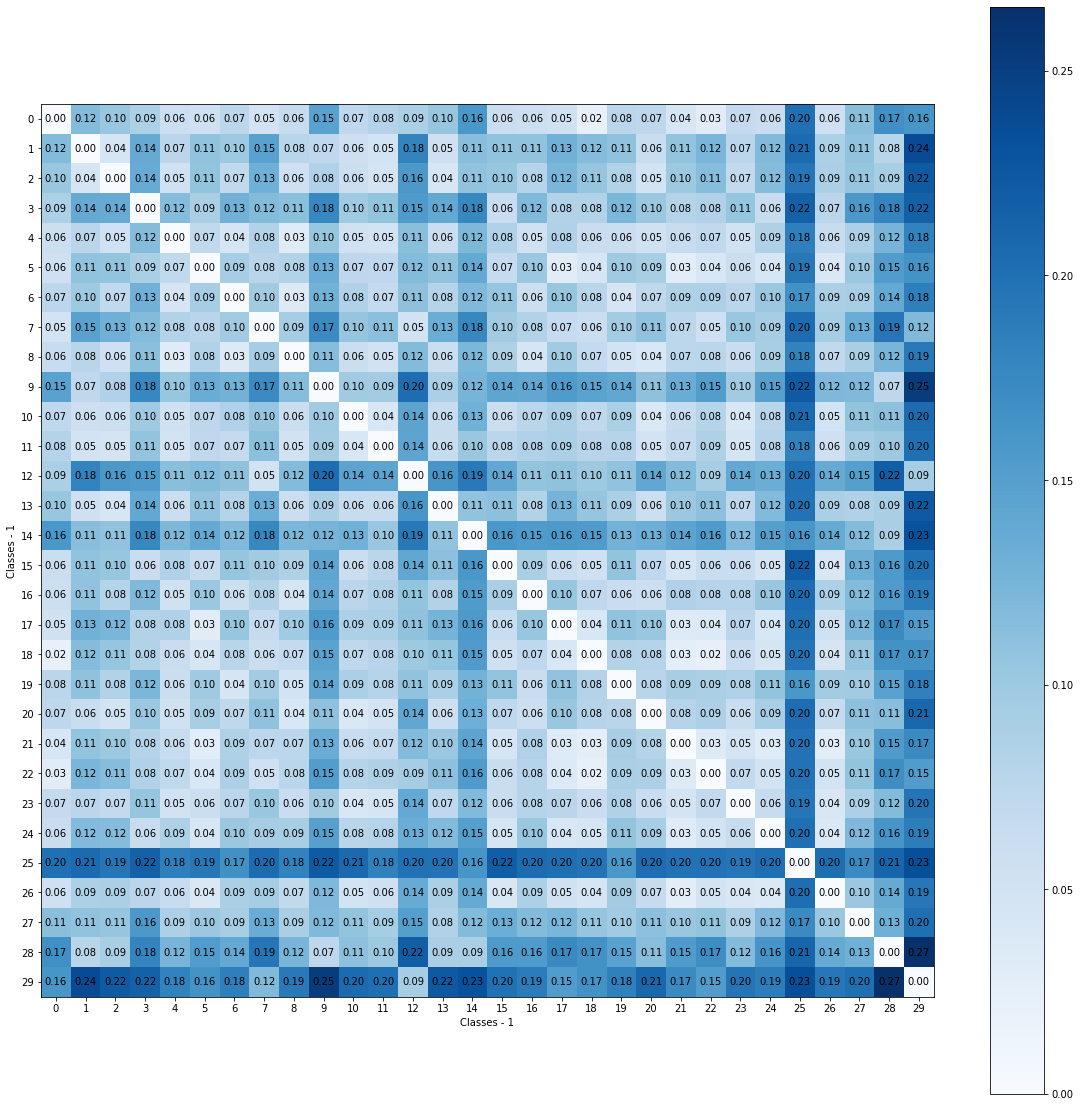

In [160]:
printDistancesMatrix(dbcO0)